<a href="https://colab.research.google.com/github/torotoro21/GLAUCOMA-DETECTION/blob/ILHAM/Copy_of_Experiment_Hyperparameters_in_5_Layer_Glaucoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import numpy as np
from imutils import paths
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from google.colab import drive
import zipfile
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing Dataset

In [ ]:
img_paths = '/content/drive/MyDrive/dataset/Glaukoma.zip'
zip_ref = zipfile.ZipFile(img_paths, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
image_paths=paths.list_images("/content/Glaukoma")
gambar = []
label = []

In [ ]:
from sklearn import preprocessing
for images in image_paths:
  image = Image.open(images)
  image = image.convert('RGB')
  image = np.array(image.resize((224,224))) / 255.0

  gambar.append(image)
  labels=images.split(os.path.sep)[-2]
  label.append(labels)

In [ ]:
labels_train_unique = np.unique(np.array(label))

In [ ]:
temp = np.array(gambar)
print(temp.shape)

(1181, 224, 224, 3)


In [ ]:
temp2=np.array(label)
print(temp2.shape)
print(label)

(1181,)
['normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', '

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
label = lb.fit_transform(label)
print(label)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(np.array(gambar), np.array(label), test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(944, 224, 224, 3)
(237, 224, 224, 3)
(944, 1)
(237, 1)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import RMSprop                                    

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from tensorflow.keras import layers, optimizers, regularizers
from keras.layers import Dropout

# Experiment BatchSize

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, bs):
    model = Sequential()
    model.add(Conv2D(16, 5, padding="same", activation="relu", input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(32, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(64, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Dropout(0.2))
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = Adam(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=bs, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Batch Size='+str(bs))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
15/15 [==============================] - 15s 211ms/step - loss: 0.6541 - accuracy: 0.6441 - val_loss: 0.6474 - val_accuracy: 0.6371
Epoch 2/50
15/15 [==============================] - 2s 102ms/step - loss: 0.6429 - accuracy: 0.6441 - val_loss: 0.6349 - val_accuracy: 0.6371
Epoch 3/50
15/15 [==============================] - 2s 102ms/step - loss: 0.6220 - accuracy: 0.6504 - val_loss: 0.6040 - val_accuracy: 0.6667
Epoch 4/50
15/15 [==============================] - 2s 103ms/step - loss: 0.5776 - accuracy: 0.6833 - val_loss: 0.5681 - val_accuracy: 0.7300
Epoch 5/50
15/15 [==============================] - 2s 103ms/step - loss: 0.4919 - accuracy: 0.7595 - val_loss: 0.4869 - val_accuracy: 0.7764
Epoch 6/50
15/15 [==============================] - 2s 101ms/step - loss: 0.4437 - accuracy: 0.7956 - val_loss: 0.4467 - val_accuracy: 0.8017
Epoch 7/50
15/15 [==============================] - 2s 102ms/step - loss: 0.4054 - accuracy: 0.8231 - val_loss: 0.4318 - val_accuracy: 0.8186
Epoch

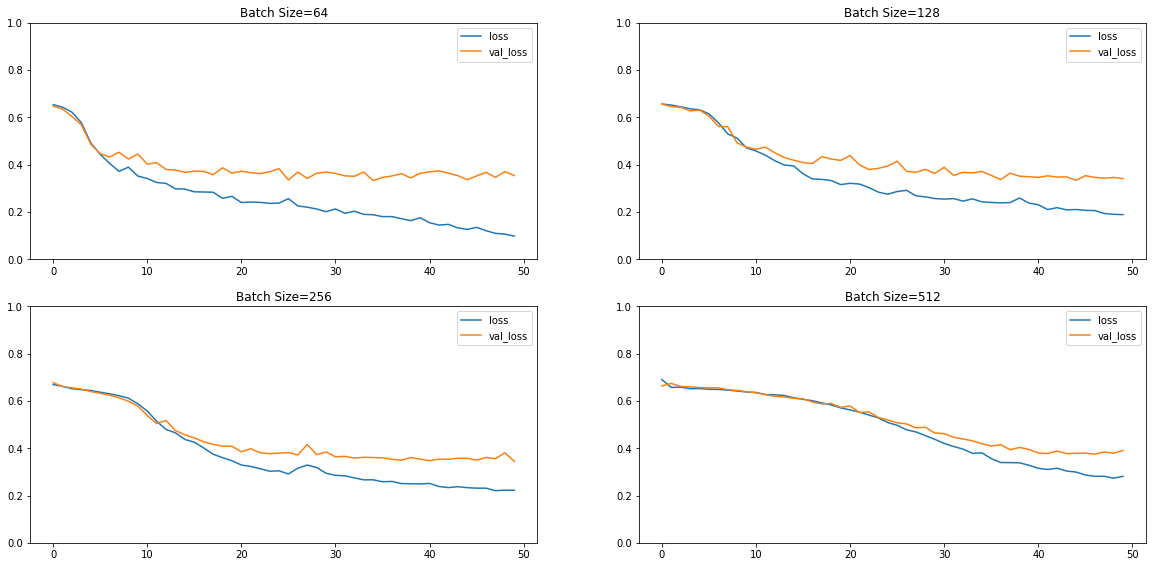

In [ ]:
batch_size = [64, 128,256, 512]


plt.figure(figsize=(20, 20))
for i in range(len(batch_size)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, batch_size[i])

# show learning curves
plt.show()

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, bs):
    model = Sequential()
    model.add(Conv2D(16, 5, padding="same", activation="relu", input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(32, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(64, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Dropout(0.2))
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = Adam(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=bs, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title('Batch Size='+str(bs))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
15/15 [==============================] - 11s 204ms/step - loss: 0.6693 - accuracy: 0.6441 - val_loss: 0.6716 - val_accuracy: 0.6371
Epoch 2/50
15/15 [==============================] - 2s 102ms/step - loss: 0.6523 - accuracy: 0.6441 - val_loss: 0.6574 - val_accuracy: 0.6371
Epoch 3/50
15/15 [==============================] - 2s 102ms/step - loss: 0.6429 - accuracy: 0.6441 - val_loss: 0.6437 - val_accuracy: 0.6371
Epoch 4/50
15/15 [==============================] - 2s 102ms/step - loss: 0.6286 - accuracy: 0.6441 - val_loss: 0.6324 - val_accuracy: 0.6371
Epoch 5/50
15/15 [==============================] - 2s 101ms/step - loss: 0.6067 - accuracy: 0.6578 - val_loss: 0.5779 - val_accuracy: 0.6667
Epoch 6/50
15/15 [==============================] - 2s 101ms/step - loss: 0.5368 - accuracy: 0.7235 - val_loss: 0.4745 - val_accuracy: 0.7932
Epoch 7/50
15/15 [==============================] - 1s 101ms/step - loss: 0.4880 - accuracy: 0.7648 - val_loss: 0.4503 - val_accuracy: 0.7848
Epoch

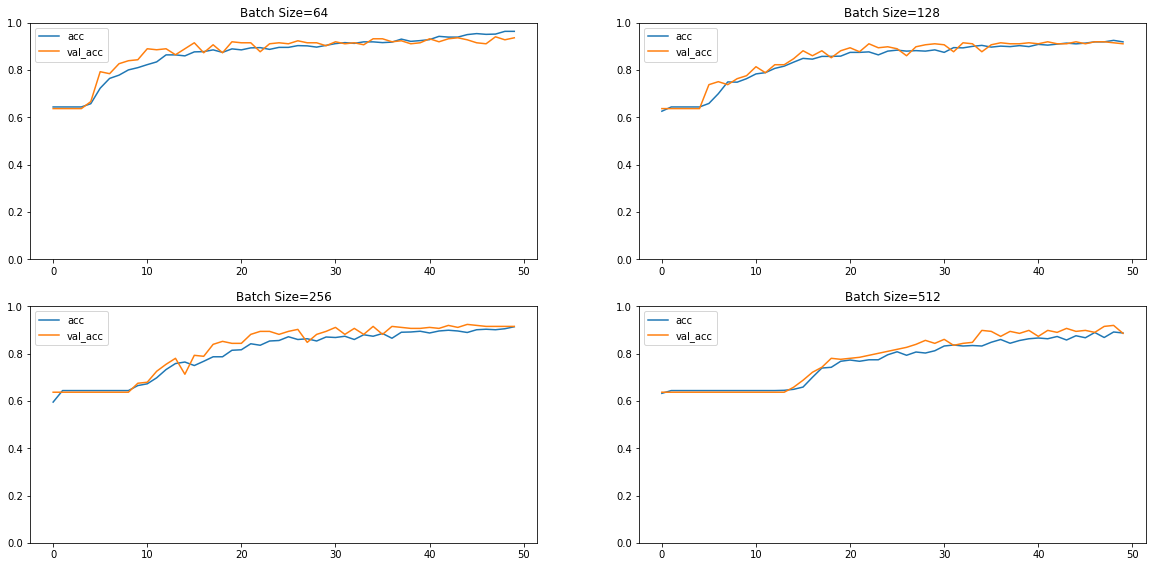

In [ ]:
batch_size = [64, 128,256, 512]


plt.figure(figsize=(20, 20))
for i in range(len(batch_size)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, batch_size[i])

# show learning curves
plt.show()

# Dense

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, dense):
    model = Sequential()
    model.add(Conv2D(16, 5, padding="same", activation="relu", input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(32, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(64, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Dropout(0.2))
    model.add(Flatten())

    model.add(Dense(dense, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = Adam(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Dense='+str(dense))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
15/15 [==============================] - 3s 136ms/step - loss: 0.6654 - accuracy: 0.6165 - val_loss: 0.6568 - val_accuracy: 0.6371
Epoch 2/50
15/15 [==============================] - 2s 101ms/step - loss: 0.6469 - accuracy: 0.6441 - val_loss: 0.6541 - val_accuracy: 0.6371
Epoch 3/50
15/15 [==============================] - 2s 103ms/step - loss: 0.6362 - accuracy: 0.6441 - val_loss: 0.6334 - val_accuracy: 0.6371
Epoch 4/50
15/15 [==============================] - 2s 110ms/step - loss: 0.6176 - accuracy: 0.6441 - val_loss: 0.6180 - val_accuracy: 0.6624
Epoch 5/50
15/15 [==============================] - 1s 101ms/step - loss: 0.5772 - accuracy: 0.6875 - val_loss: 0.5553 - val_accuracy: 0.7215
Epoch 6/50
15/15 [==============================] - 2s 106ms/step - loss: 0.5198 - accuracy: 0.7595 - val_loss: 0.4620 - val_accuracy: 0.7890
Epoch 7/50
15/15 [==============================] - 2s 115ms/step - loss: 0.4696 - accuracy: 0.7733 - val_loss: 0.4607 - val_accuracy: 0.7722
Epoch 

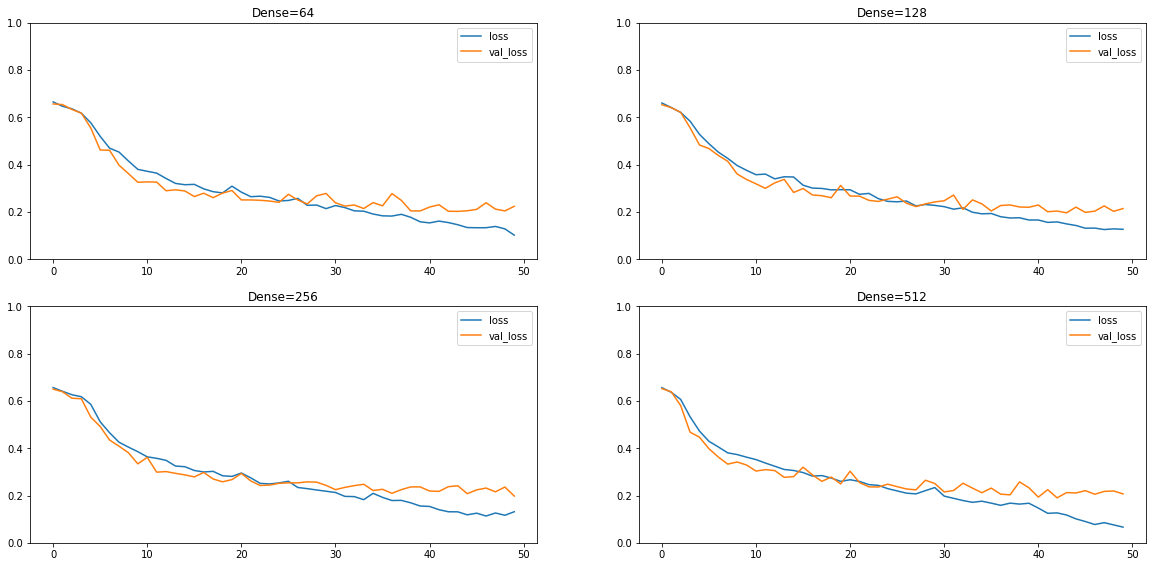

In [ ]:
dense = [64, 128,256, 512]


plt.figure(figsize=(20, 20))
for i in range(len(dense)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, dense[i])

# show learning curves
plt.show()

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, dense):
    model = Sequential()
    model.add(Conv2D(16, 5, padding="same", activation="relu", input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(32, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(64, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Dropout(0.2))
    model.add(Flatten())

    model.add(Dense(dense, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = Adam(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title('Dense='+str(dense))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
15/15 [==============================] - 12s 206ms/step - loss: 0.6690 - accuracy: 0.6261 - val_loss: 0.6547 - val_accuracy: 0.6371
Epoch 2/50
15/15 [==============================] - 1s 100ms/step - loss: 0.6528 - accuracy: 0.6441 - val_loss: 0.6381 - val_accuracy: 0.6371
Epoch 3/50
15/15 [==============================] - 1s 101ms/step - loss: 0.6404 - accuracy: 0.6441 - val_loss: 0.6301 - val_accuracy: 0.6371
Epoch 4/50
15/15 [==============================] - 2s 101ms/step - loss: 0.6306 - accuracy: 0.6441 - val_loss: 0.6104 - val_accuracy: 0.6371
Epoch 5/50
15/15 [==============================] - 1s 100ms/step - loss: 0.6019 - accuracy: 0.6653 - val_loss: 0.5721 - val_accuracy: 0.6878
Epoch 6/50
15/15 [==============================] - 2s 102ms/step - loss: 0.5496 - accuracy: 0.7331 - val_loss: 0.5077 - val_accuracy: 0.7468
Epoch 7/50
15/15 [==============================] - 2s 101ms/step - loss: 0.4780 - accuracy: 0.7733 - val_loss: 0.4762 - val_accuracy: 0.7679
Epoch

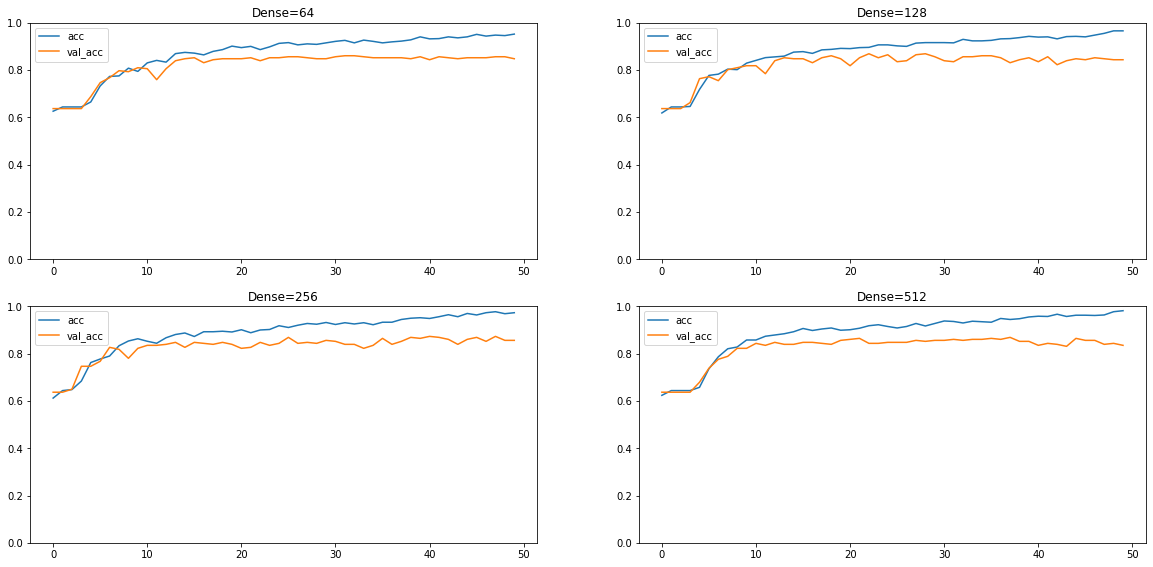

In [ ]:
dense = [64, 128,256, 512]


plt.figure(figsize=(20, 20))
for i in range(len(dense)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, dense[i])

# show learning curves
plt.show()

# Experiment epoch

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, ep):
    model = Sequential()
    model.add(Conv2D(16, 5, padding="same", activation="relu", input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(32, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(64, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Dropout(0.2))
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = Adam(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=ep, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Epoch='+str(ep))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/20
15/15 [==============================] - 3s 135ms/step - loss: 0.6772 - accuracy: 0.6303 - val_loss: 0.6585 - val_accuracy: 0.6371
Epoch 2/20
15/15 [==============================] - 2s 110ms/step - loss: 0.6559 - accuracy: 0.6441 - val_loss: 0.6504 - val_accuracy: 0.6371
Epoch 3/20
15/15 [==============================] - 2s 101ms/step - loss: 0.6622 - accuracy: 0.6441 - val_loss: 0.6432 - val_accuracy: 0.6371
Epoch 4/20
15/15 [==============================] - 2s 102ms/step - loss: 0.6463 - accuracy: 0.6441 - val_loss: 0.6382 - val_accuracy: 0.6371
Epoch 5/20
15/15 [==============================] - 2s 103ms/step - loss: 0.6355 - accuracy: 0.6441 - val_loss: 0.6229 - val_accuracy: 0.6371
Epoch 6/20
15/15 [==============================] - 2s 103ms/step - loss: 0.6092 - accuracy: 0.6653 - val_loss: 0.5869 - val_accuracy: 0.6456
Epoch 7/20
15/15 [==============================] - 2s 104ms/step - loss: 0.5579 - accuracy: 0.7267 - val_loss: 0.5190 - val_accuracy: 0.7553
Epoch 

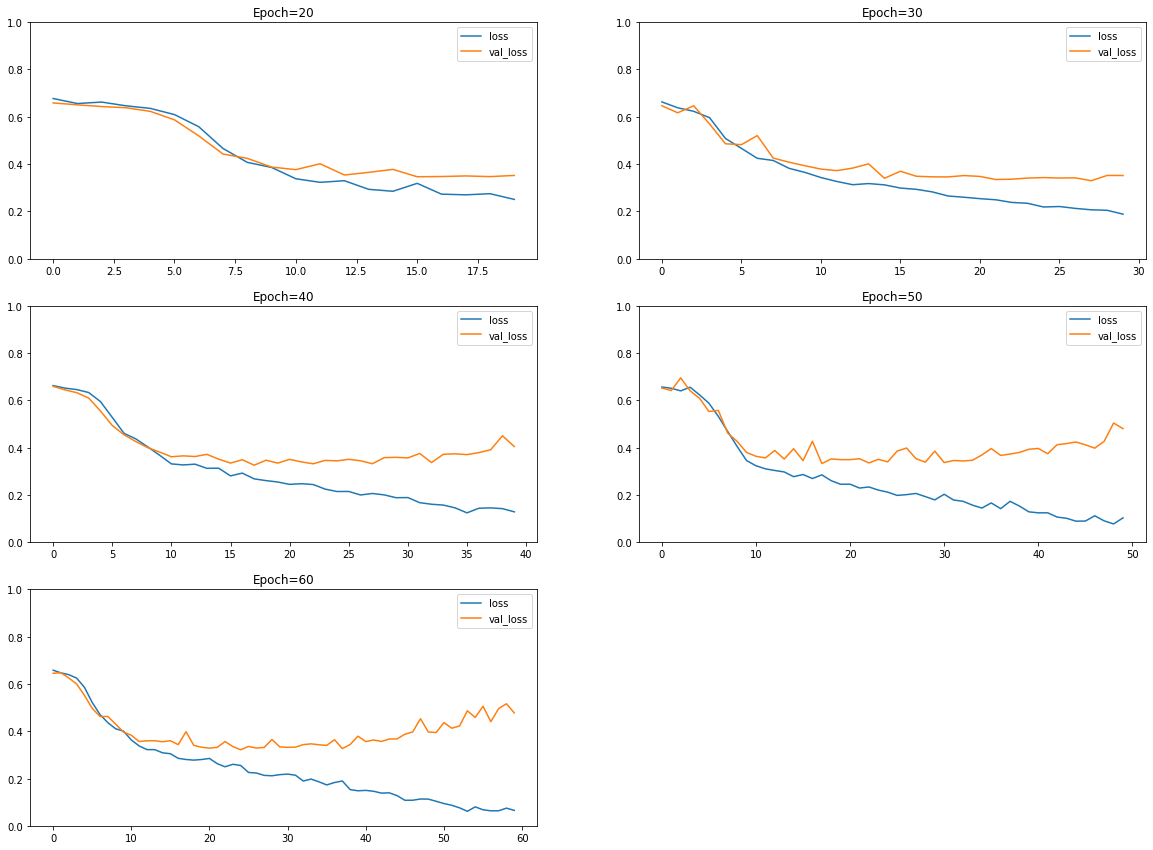

In [ ]:
epoch = [20, 30, 40, 50, 60]


plt.figure(figsize=(20, 20))
for i in range(len(epoch)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, epoch[i])

# show learning curves
plt.show()

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, ep):
    model = Sequential()
    model.add(Conv2D(16, 5, padding="same", activation="relu", input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(32, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(64, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Dropout(0.2))
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = Adam(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=ep, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title('Epoch='+str(ep))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/20
15/15 [==============================] - 2s 122ms/step - loss: 0.6553 - accuracy: 0.6451 - val_loss: 0.6404 - val_accuracy: 0.6371
Epoch 2/20
15/15 [==============================] - 2s 101ms/step - loss: 0.6426 - accuracy: 0.6441 - val_loss: 0.6311 - val_accuracy: 0.6371
Epoch 3/20
15/15 [==============================] - 2s 102ms/step - loss: 0.6266 - accuracy: 0.6504 - val_loss: 0.6110 - val_accuracy: 0.6582
Epoch 4/20
15/15 [==============================] - 2s 101ms/step - loss: 0.5888 - accuracy: 0.6843 - val_loss: 0.5544 - val_accuracy: 0.7257
Epoch 5/20
15/15 [==============================] - 2s 101ms/step - loss: 0.5195 - accuracy: 0.7606 - val_loss: 0.5334 - val_accuracy: 0.7342
Epoch 6/20
15/15 [==============================] - 2s 101ms/step - loss: 0.4653 - accuracy: 0.7765 - val_loss: 0.4628 - val_accuracy: 0.7890
Epoch 7/20
15/15 [==============================] - 2s 103ms/step - loss: 0.4534 - accuracy: 0.7860 - val_loss: 0.4644 - val_accuracy: 0.7932
Epoch 

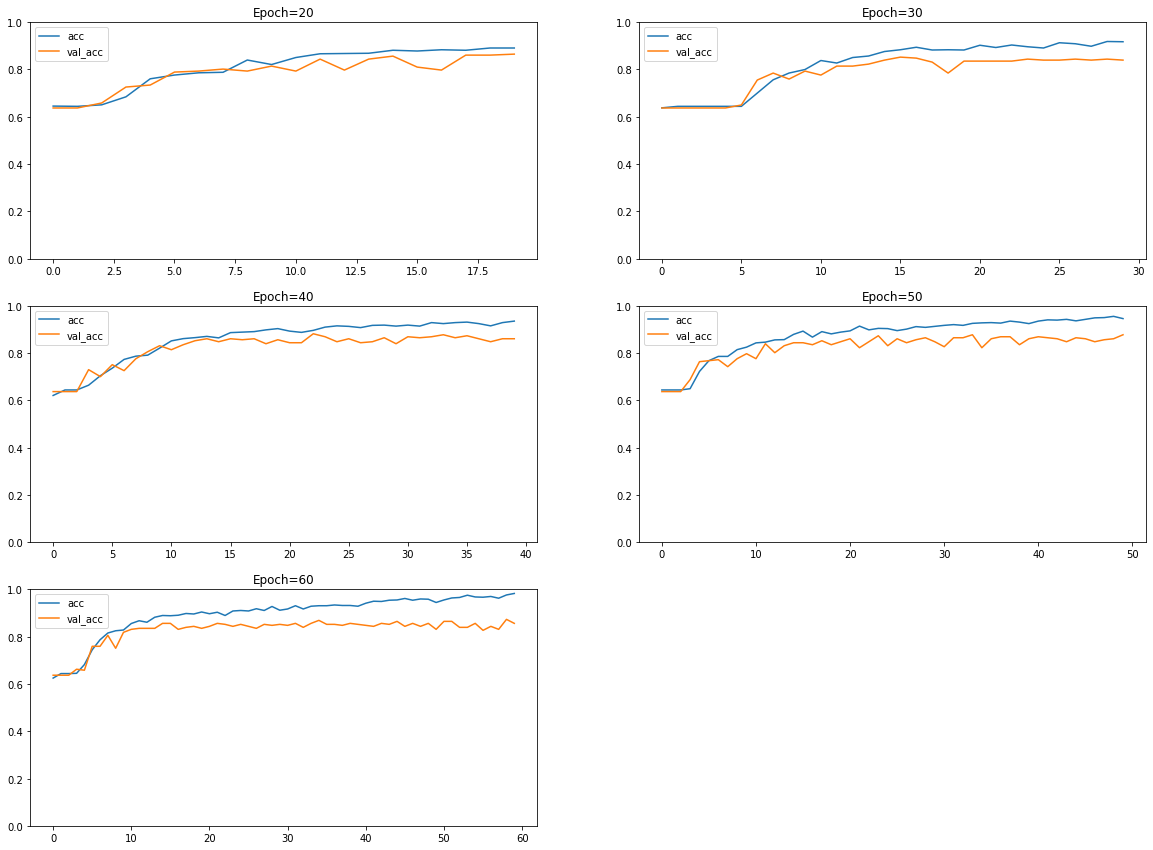

In [ ]:
epoch = [20, 30, 40, 50, 60]


plt.figure(figsize=(20, 20))
for i in range(len(epoch)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, epoch[i])

# show learning curves
plt.show()

# Learning rate

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, lr):
    model = Sequential()
    model.add(Conv2D(16, 5, padding="same", activation="relu", input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(32, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(64, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Dropout(0.2))
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = Adam(learning_rate=lr),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Learning Rate='+str(lr))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
15/15 [==============================] - 2s 121ms/step - loss: 32.6638 - accuracy: 0.5614 - val_loss: 0.6551 - val_accuracy: 0.6371
Epoch 2/50
15/15 [==============================] - 1s 100ms/step - loss: 0.6539 - accuracy: 0.6441 - val_loss: 0.6551 - val_accuracy: 0.6371
Epoch 3/50
15/15 [==============================] - 1s 100ms/step - loss: 0.6552 - accuracy: 0.6441 - val_loss: 0.6558 - val_accuracy: 0.6371
Epoch 4/50
15/15 [==============================] - 1s 100ms/step - loss: 0.6650 - accuracy: 0.6441 - val_loss: 0.6685 - val_accuracy: 0.6371
Epoch 5/50
15/15 [==============================] - 2s 101ms/step - loss: 0.6595 - accuracy: 0.6441 - val_loss: 0.6562 - val_accuracy: 0.6371
Epoch 6/50
15/15 [==============================] - 1s 100ms/step - loss: 0.6561 - accuracy: 0.6441 - val_loss: 0.6551 - val_accuracy: 0.6371
Epoch 7/50
15/15 [==============================] - 2s 101ms/step - loss: 0.6560 - accuracy: 0.6441 - val_loss: 0.6557 - val_accuracy: 0.6371
Epoch

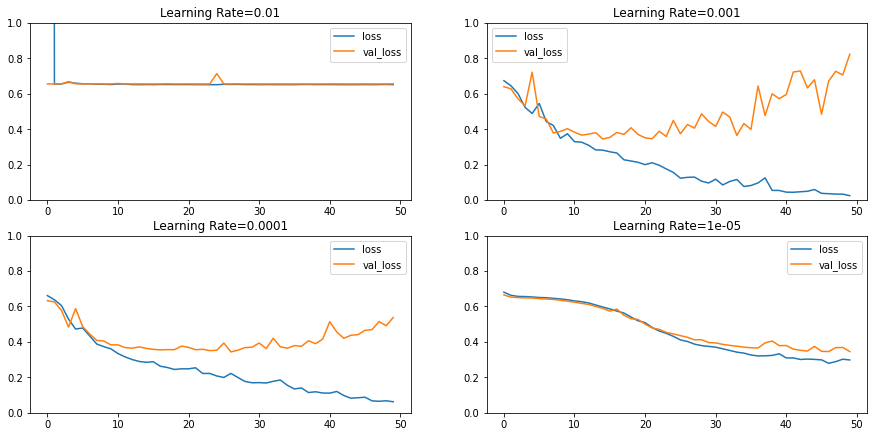

In [ ]:
lr = [0.01, 0.001, 0.0001, 0.00001]


plt.figure(figsize=(15, 15))
for i in range(len(lr)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, lr[i])

# show learning curves
plt.show()

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, lr):
    model = Sequential()
    model.add(Conv2D(16, 5, padding="same", activation="relu", input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(32, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(64, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Dropout(0.2))
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = Adam(learning_rate=lr),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title('Learning Rate='+str(lr))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
15/15 [==============================] - 13s 208ms/step - loss: 42.6184 - accuracy: 0.5689 - val_loss: 0.6434 - val_accuracy: 0.6582
Epoch 2/50
15/15 [==============================] - 2s 101ms/step - loss: 0.6634 - accuracy: 0.6388 - val_loss: 0.6603 - val_accuracy: 0.6582
Epoch 3/50
15/15 [==============================] - 2s 102ms/step - loss: 1.0003 - accuracy: 0.6377 - val_loss: 0.6661 - val_accuracy: 0.6582
Epoch 4/50
15/15 [==============================] - 2s 111ms/step - loss: 0.6659 - accuracy: 0.6388 - val_loss: 0.6555 - val_accuracy: 0.6582
Epoch 5/50
15/15 [==============================] - 2s 101ms/step - loss: 0.6583 - accuracy: 0.6388 - val_loss: 0.6463 - val_accuracy: 0.6582
Epoch 6/50
15/15 [==============================] - 1s 101ms/step - loss: 0.6552 - accuracy: 0.6388 - val_loss: 0.6430 - val_accuracy: 0.6582
Epoch 7/50
15/15 [==============================] - 2s 101ms/step - loss: 0.6545 - accuracy: 0.6388 - val_loss: 0.6431 - val_accuracy: 0.6582
Epoc

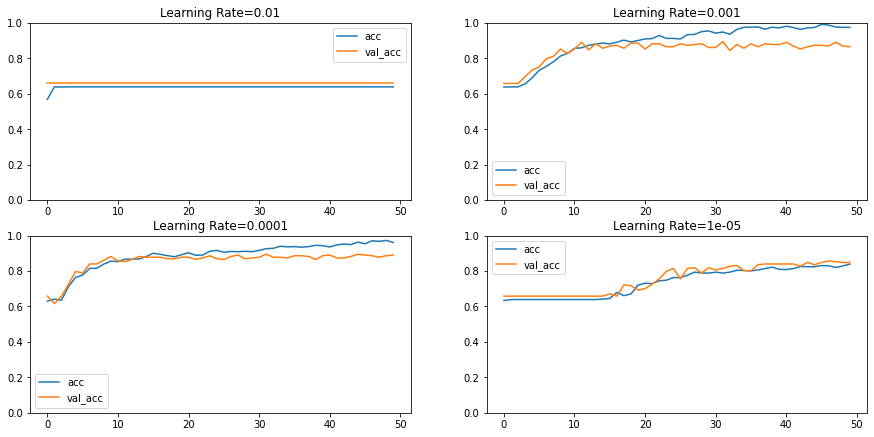

In [ ]:
lr = [0.01, 0.001, 0.0001, 0.00001]


plt.figure(figsize=(15, 15))
for i in range(len(lr)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, lr[i])

# show learning curves
plt.show()

# Optimizer

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, opt):
    model = Sequential()
    model.add(Conv2D(16, 5, padding="same", activation="relu", input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(32, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(64, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Dropout(0.2))
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = opt(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Optimizer='+str(opt))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
15/15 [==============================] - 4s 140ms/step - loss: 0.6604 - accuracy: 0.6356 - val_loss: 0.6430 - val_accuracy: 0.6582
Epoch 2/50
15/15 [==============================] - 2s 112ms/step - loss: 0.6434 - accuracy: 0.6388 - val_loss: 0.6249 - val_accuracy: 0.6582
Epoch 3/50
15/15 [==============================] - 2s 102ms/step - loss: 0.6244 - accuracy: 0.6388 - val_loss: 0.5744 - val_accuracy: 0.6751
Epoch 4/50
15/15 [==============================] - 2s 102ms/step - loss: 0.5617 - accuracy: 0.7140 - val_loss: 0.4891 - val_accuracy: 0.7679
Epoch 5/50
15/15 [==============================] - 2s 103ms/step - loss: 0.4989 - accuracy: 0.7500 - val_loss: 0.4318 - val_accuracy: 0.7975
Epoch 6/50
15/15 [==============================] - 2s 103ms/step - loss: 0.4433 - accuracy: 0.7892 - val_loss: 0.3964 - val_accuracy: 0.8017
Epoch 7/50
15/15 [==============================] - 2s 102ms/step - loss: 0.3921 - accuracy: 0.8284 - val_loss: 0.3469 - val_accuracy: 0.8523
Epoch 

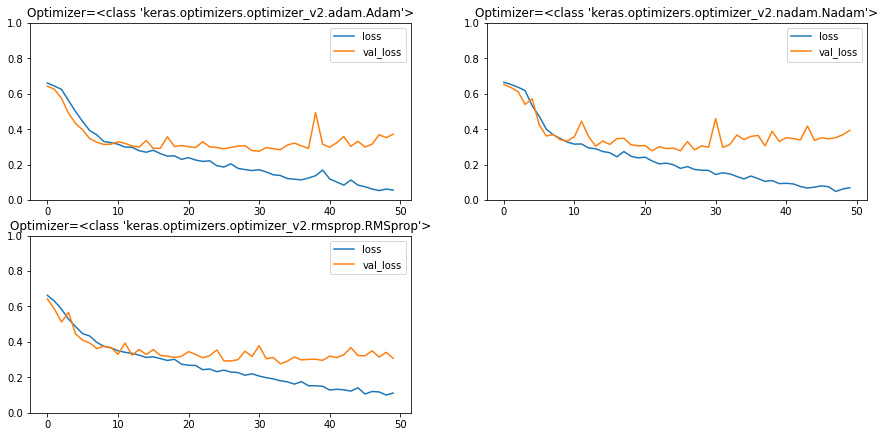

In [ ]:
opt = [Adam, Nadam, RMSprop]


plt.figure(figsize=(15, 15))
for i in range(len(opt)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, opt[i])

# show learning curves
plt.show()

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, opt):
    model = Sequential()
    model.add(Conv2D(16, 5, padding="same", activation="relu", input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(32, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(64, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(128, 5, padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Dropout(0.2))
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = opt(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title('Optimizer='+str(opt))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
15/15 [==============================] - 4s 165ms/step - loss: 0.6593 - accuracy: 0.6218 - val_loss: 0.6395 - val_accuracy: 0.6582
Epoch 2/50
15/15 [==============================] - 2s 108ms/step - loss: 0.6489 - accuracy: 0.6388 - val_loss: 0.6336 - val_accuracy: 0.6582
Epoch 3/50
15/15 [==============================] - 2s 112ms/step - loss: 0.6393 - accuracy: 0.6388 - val_loss: 0.6246 - val_accuracy: 0.6582
Epoch 4/50
15/15 [==============================] - 2s 102ms/step - loss: 0.6145 - accuracy: 0.6653 - val_loss: 0.6013 - val_accuracy: 0.7426
Epoch 5/50
15/15 [==============================] - 2s 104ms/step - loss: 0.5603 - accuracy: 0.7468 - val_loss: 0.5103 - val_accuracy: 0.7173
Epoch 6/50
15/15 [==============================] - 2s 102ms/step - loss: 0.4973 - accuracy: 0.7744 - val_loss: 0.4563 - val_accuracy: 0.7890
Epoch 7/50
15/15 [==============================] - 2s 112ms/step - loss: 0.4497 - accuracy: 0.7913 - val_loss: 0.3972 - val_accuracy: 0.8481
Epoch 

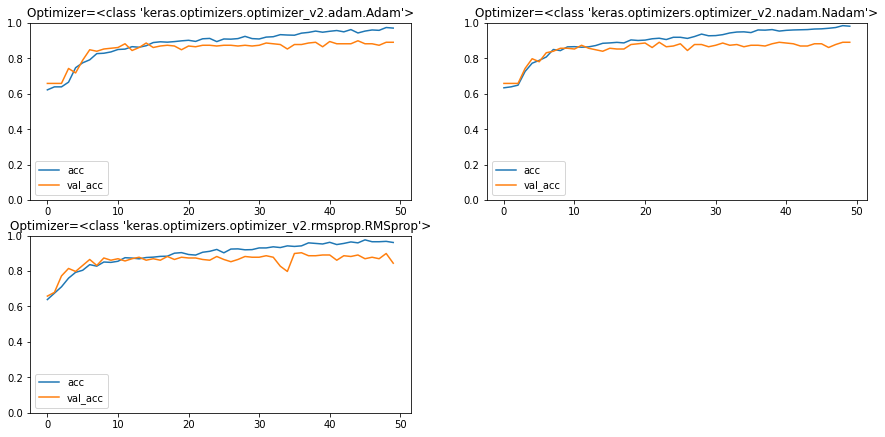

In [ ]:
opt = [Adam, Nadam, RMSprop]


plt.figure(figsize=(15, 15))
for i in range(len(opt)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, opt[i])

# show learning curves
plt.show()